This lecture note is based on "An Introduction to NUMERICAL ANALYSIS" (2nd Edition) <br> by Kendall E. Atkinson


# Chapter 5. NUMERICAL INTEGRATION

### Goal

To derive and analyze numerical methods for evaluating definite integrals

\begin{align*}
	I(f) = \int_a^b f(x)\ dx
\end{align*}

### Fundamental Theorem of Calculus

If $f$ is continuous on $[a,b]$ and $F$ is an antiderivative of $f$, then

\begin{align*}
	\int_a^b f(x) \ dx = F(b) - F(a)
\end{align*}

### Numerical Integration

For the integrand $f(x)$, find an approximating family $\{f_n(x)\ |\ n\ge 1\}$

$$\|f - f_n\|_{\infty} \rightarrow 0 \quad \textrm{as} \quad n \rightarrow \infty$$

- Numerical Integration
$$I_n(f) = \int_a^b f_n(x)\ dx = I(f_n)$$ <br>

- Error
$$E_n(f) = I(f) - I_n(f) = \int_a^b [f(x) - f_n(x)] \ dx$$
$$\Rightarrow \quad |E_n(f)| \le \int_a^b |f(x) - f_n(x)|\ dx \le (b-a)\|f - f_n\|_{\infty}$$

<span style="color:blue">[Example]</span> &emsp; Evaluate
$$I = \int_0^1 \frac{e^x - 1}{x}\ dx$$
<br>

By a Taylor series for $e^x$,
\begin{align*}
	I = \int_0^1 \frac{e^x - 1}{x}\ dx \quad \approx \quad I_n = \int_0^1 \sum_{j=1}^n \frac{x^{j-1}}{j!}\ dx = \sum_{j=1}^n \frac{1}{(j!)(j)}
\end{align*}
and
\begin{align*}
	\frac{1}{(n+1)!(n+1)} \le I - I_n \le \frac{e}{(n+1)!(n+1)}
\end{align*}

### Numerical Integration

Most numerical integrals $I_n(f)$ will have the following form

\begin{align*}
	I_n(f) = \sum_{j=1}^n w_{j,n} f(x_{j,n})
\end{align*}
<br>

$w_{j,n}$ : the integration weights or quadrature weights <br>

$x_{j,n}$ : the integration nodes or quadrature points

## 5.1 The Trapezoidal Rule and Simpson's Rule

### Trapezoidal Rule

- Linear interpolating polynomial
$$p_1(x) = \frac{(b-x)f(a) + (x-a)f(b)}{b-a}$$
<br>

- Trapezoidal rule
$$I_1(f) = \int_a^b p_1(x)\ dx = \left(\frac{b-a}{2}\right)[f(a) + f(b)]$$
<br>

- Error formula
$$E_1(f) = -\frac{(b-a)^3}{12}f''(\eta), \quad \eta \in [a,b]$$

### Composite Trapezoidal Rule

Let $n\ge 1$, $h = (b-a)/n$, and $x_j = a+ j h$ for $j = 0,1,\dots,n$

- Composite trapezoidal rule
$$I_n(f) = h\sum_{j=1}^{n-1} f(x_j) + \frac{h}{2}[f(x_0) + f(x_n)], \quad n\ge 2$$
<br>

- Error formula
\begin{align*}
		E_n(f) &= -\frac{(b-a) h^2}{12}f''(\eta), \quad \eta \in [a,b] \\
		&\approx -\frac{h^2}{12}[f'(b) - f'(a)] \equiv \tilde{E}_n(f)
\end{align*}

### Asymptotic Error Estimate

***
**Definition** &emsp; Let $E_n(f)$ be an exact error formula, and let $\tilde{E}_n(f)$ be an estimate of it. We say that $\tilde{E}_n(f)$ is an *asymptotic error estimate* for $E_n(f)$ if
$$\lim_{n\rightarrow \infty} \frac{\tilde{E}_n(f)}{E_n(f)} = 1, \quad \textrm{or equivalently,} \quad \lim_{n\rightarrow \infty} \frac{E_n(f) - \tilde{E}_n(f)}{E_n(f)} = 0$$
***

Write the following code to evaluate the composite trapezoidal rule

In [1]:
import numpy as np

def composite_trapezoidal(f,n,a,b):
    h = (b-a)/n
    x = np.linspace(a,b,num=n+1)
    I = np.sum(f(x[1:-1]))*h + h/2*(f(x[0])+f(x[-1]))
    return I

<span style="color:blue">[Example]</span> &emsp; Use the composite trapezoidal rule to calculate
$$I = \int_0^\pi e^x \cos x\ dx$$
with $n = 2^j,\ j = 1,2,\cdots,9$ and check the rates of convergence.

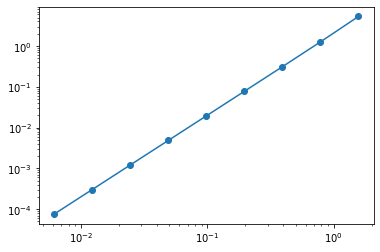

In [14]:
import matplotlib.pylab as plt
%matplotlib inline

num_iter = 9
E = np.zeros(num_iter)
I_exact = -(np.exp(np.pi)+1)/2
f = lambda x: np.exp(x) * np.cos(x)
a = 0
b = np.pi

for j in range(0,num_iter):
    n = 2**(j+1)
    I = composite_trapezoidal(f,n,a,b)
    E[j] = np.abs(I_exact - I)

h = np.pi/2**(np.array([i+1 for i in range(0,num_iter)]))
plt.loglog(h,E,'o-')
plt.show()

In [15]:
rate_of_convergence = (np.log(E[1::]) - np.log(E[0:-1]))/(np.log(h[1::])-np.log(h[0:-1]))
print(rate_of_convergence)

[2.0712227  2.02114135 2.00549305 2.0013862  2.00034736 2.00008689
 2.00002173 2.00000543]


Check
$$\lim_{n\rightarrow \infty} \frac{\tilde{E}_n(f)}{E_n(f)} = 1$$

In [13]:
Df = lambda x: np.exp(x) * (np.cos(x) - np.sin(x))
E_asymptotic = np.abs(h**2 / 12 * (Df(b) - Df(a)))
print(E_asymptotic/E)

[0.93322281 0.98045015 0.99492352 0.9987189  0.99967897 0.9999197
 0.99997992 0.99999498 0.99999875]


### Corrected Trapezoidal Rule

\begin{align*}
	CT_n(f) &\equiv I_n(f) + \tilde{E}_n(f) \\
	&= h\left[\frac{1}{2}f_0 + f_1 + \cdots + f_{n-1} + \frac{1}{2}f_n\right] - \frac{h^2}{12}[f'(b) - f'(a)]
\end{align*}
<br>

- Trapezoidal Rule $\sim \mathcal{O}(h^2)$ 
<br>

- Corrected Trapezoidal Rule $\sim \mathcal{O}(h^4)$

Write the following code to evaluate the corrected trapezoidal rule

In [17]:
def corrected_trapezoidal(f,Df,n,a,b):
    h = (b-a)/n
    I = composite_trapezoidal(f,n,a,b)
    I -= h**2 / 12 * (Df(b) - Df(a))
    return I

<span style="color:blue">[Example]</span> &emsp; Use the corrected trapezoidal rule to calculate
$$I = \int_0^\pi e^x \cos x\ dx$$
with $n = 2^j,\ j = 1,2,\cdots,9$ and check the rates of convergence.

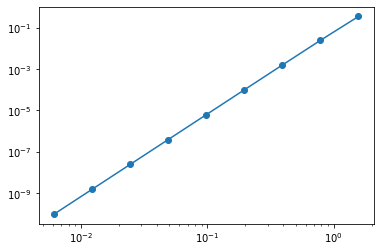

In [18]:
import matplotlib.pylab as plt
%matplotlib inline

num_iter = 9
E = np.zeros(num_iter)
I_exact = -(np.exp(np.pi)+1)/2
f = lambda x: np.exp(x) * np.cos(x)
Df = lambda x: np.exp(x) * (np.cos(x) - np.sin(x))
a = 0
b = np.pi

for j in range(0,num_iter):
    n = 2**(j+1)
    I = corrected_trapezoidal(f,Df,n,a,b)
    E[j] = np.abs(I_exact - I)

h = np.pi/2**(np.array([i+1 for i in range(0,num_iter)]))
plt.loglog(h,E,'o-')
plt.show()

In [19]:
rate_of_convergence = (np.log(E[1::]) - np.log(E[0:-1]))/(np.log(h[1::])-np.log(h[0:-1]))
print(rate_of_convergence)

[3.84342027 3.96639883 3.99194102 3.99800649 3.99950296 3.99987601
 3.99996914 4.00004887]


### Simpson's Rule

- Quadratic interpolating polynomial
$$p_2(x) = \frac{(x-c)(x-b)}{(a-c)(a-b)}f(a) + \frac{(x-a)(x-c)}{(b-a)(b-c)}f(b) + \frac{(x-a)(x-b)}{(c-a)(c-b)}f(c)$$
<br>

- Simpson's rule
$$I_2(f) = \int_a^b p_2(x)\ dx = \frac{b-a}{6}\left(f(a) + 4f\left(\frac{a+b}{2}\right) + f(b)\right)$$
<br>

- Error formula
$$E_2(f) = -\frac{h^5}{90}f^{(4)}(\eta), \qquad h = \frac{b-a}{2}, \ \eta \in [a,b]$$

### Composite Simpson's Rule

Let $n\ge 2$, $h = (b-a)/n$, and $x_j = a+ j h$ for $j = 0,1,\dots,n$ <br>

- Composite SImpson's rule
$$I_n(f) = \frac{h}{3}[f_0 + 4 f_1 + 2 f_2 + 4 f_3 + 2 f_4 +\cdots + 2f_{n-2} + 4f_{n-1} + f_n]$$
<br>

- Error formula
\begin{align*}
		E_n(f) &= -\frac{h^4(b-a)}{180}f^{(4)}(\eta), \quad \eta \in [a,b] \\
		&\approx -\frac{h^4}{180}[f^{(3)}(b) - f^{(3)}(a)] \equiv \tilde{E}_n(f)
\end{align*}

Write the following code to evaluate the composite Simpson's rule

In [20]:
def composite_simpson(f,n,a,b):
    h = (b-a)/n
    x = np.linspace(a,b,num=n+1)
    I = (f(x[0]) + np.sum(4*f(x[1:-1:2])) + np.sum(2*f(x[2:-2:2])) + f(x[-1])) * h / 3
    return I

<span style="color:blue">[Example]</span> &emsp; Use the composite Simpson's rule to calculate
$$I = \int_0^\pi e^x \cos x\ dx$$
with $n = 2^j,\ j = 1,2,\cdots,9$ and check the rates of convergence.

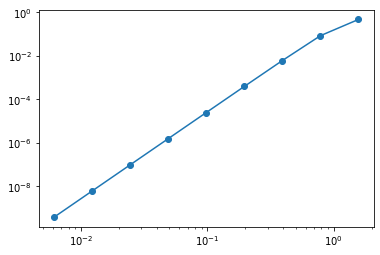

In [21]:
import matplotlib.pylab as plt
%matplotlib inline

num_iter = 9
E = np.zeros(num_iter)
I_exact = -(np.exp(np.pi)+1)/2
f = lambda x: np.exp(x) * np.cos(x)
a = 0
b = np.pi

for j in range(0,num_iter):
    n = 2**(j+1)
    I = composite_simpson(f,n,a,b)
    E[j] = np.abs(I_exact - I)

h = np.pi/2**(np.array([i+1 for i in range(0,num_iter)]))
plt.loglog(h,E,'o-')
plt.show()

In [22]:
rate_of_convergence = (np.log(E[1::]) - np.log(E[0:-1]))/(np.log(h[1::])-np.log(h[0:-1]))
print(rate_of_convergence)

[2.48317439 3.79858495 3.95771861 3.98990978 3.99750709 3.99937859
 3.99984425 3.99994776]


Check
$$\lim_{n\rightarrow \infty} \frac{\tilde{E}_n(f)}{E_n(f)} = 1$$

In [27]:
D3f = lambda x: -2 * np.exp(x) * (np.cos(x) + np.sin(x))
E_asymptotic = np.abs(h**4 / 180 * (D3f(b) - D3f(a)))
print(E_asymptotic/E)

[3.41985111 1.19508059 1.03935814 1.00933947 1.00230477 1.00057433
 1.00014344 1.00003547 0.99999926]


## 5.2 Newton-Cotes Integration Formulas

### Newton-Cotes Integration
<br>

For $n\ge 1$, let $h = (b-a)/n,\ x_j = a + j h\ (j=0,1,\dots,n$. 
Let $p_n$ be the interpolating polynomial of $f$ at $x_0, x_1, \dots, x_n$.
$$I(f) = \int_a^b f(x)\ dx \quad \approx \quad I_n(f) = \int_a^b p_n(x)\ dx$$
<br>

$$\Rightarrow \qquad I_n(f) = \sum_{j=0}^n w_{j,n}f(x_j)$$
where
$$w_{j,n} = \int_a^b \ell_{j,n}(x)\ dx, \qquad j=0,1,\dots,n$$

<span style="color:blue">[Example]</span> &emsp; 
\begin{align*}
	I_1(f) & = \frac{h}{2}[f(a)+f(b)] - \frac{h^3}{12}f''(\xi) \\
	\\
	I_2(f) & = \frac{h}{3}\left[f(a) + 4f\left(\frac{a+b}{2}\right)+f(b)\right] - \frac{h^5}{90}f^{(4)}(\xi) \\ 
	\\
	I_3(f) & = \frac{3h}{8}[f(a) + 3f(a+h) + 3f(b-h)+f(b)] - \frac{3h^5}{80}f^{(4)}(\xi) \\
	\\ 
	I_4(f) & = \frac{2h}{45}\left[7f(a) + 32f(a+h) + 12f\left(\frac{a+b}{2}\right) + 32f(b-h)+7f(b)\right] \\
	&\qquad - \frac{8h^7}{945}f^{(6)}(\xi)
\end{align*}

### Error Formula

***
**Theorem 5.1** &emsp; 

(a) For $n$ even, assume $f(x)\in C^{n+2}([a,b])$. Then
$$I(f) - I_n(f) = C_n h^{n+3}f^{(n+2)}(\eta), \quad \eta \in [a,b]$$
with
$$C_n = \frac{1}{(n+2)!}\int_0^n \mu^2(\mu-1)\cdots(\mu-n)\ d\mu$$
<br>

(b) For $n$ odd, assume $f(x)\in C^{n+1}([a,b])$. Then
$$I(f) - I_n(f) = C_n h^{n+2}f^{(n+1)}(\eta), \quad \eta \in [a,b]$$
with
$$C_n = \frac{1}{(n+1)!}\int_0^n \mu(\mu-1)\cdots(\mu-n)\ d\mu$$

### Convergence

***
**Theorem 5.2** &emsp; Let
$$I_n(f) = \sum_{j=0}^n w_{j,n} f(x_{j,n}), \qquad n\ge 1$$
be a sequence of numerical integration formulas that approximate
$$I(f) = \int_a^b f(x)\ dx.$$
Let $\mathfrak{F}$ be a family dense in $C[a,b]$. Then
$$I_n(f) \rightarrow I(f) \qquad \forall f\in C[a,b]$$
if and only if
1. $I_n(f) \rightarrow I(f) \qquad \forall f\in\mathfrak{F}$ <br>
1. $\displaystyle B\equiv \sup_{n\ge 1} \sum_{j=1}^n|w_{j,n}| < \infty$

### Discussion
$$I(f) = \int_{-4}^4 \frac{1}{1+x^2}\ dx = 2\tan^{-1}(4) \approx 2.6516$$

- Newton-Cotes example

|$n$|$I_n(f)$|
|:---:|:---:|
|$2$|$5.4902$|
|$4$|$2.2776$|
|$6$|$3.3288$|
|$8$|$1.9411$|
|$10$|$3.5956$|
	
$$\displaystyle \sup_n \sum_{j=1}^n|w_{j,n}| = \infty$$

## 5.3 Gaussian Quadrature

### Integration Formulas

For greater generality, we will consider formulas
$$I(f) = \int_a^b w(x) f(x)\ dx \quad \approx \quad I_n(f) = \sum_{j=1}^n w_{j,n}f(x_{j,n})$$
<br>

Consider the special case
\begin{align*}
	\int_{-1}^1 f(x)\ dx \approx \sum_{j=1}^n w_{j,n}f(x_{j,n}) \quad \textrm{where} \quad w(x) \equiv 1
\end{align*}

### Weights and Nodes

The weights $\{w_{j,n}\}$ and nodes $\{x_j\}$ are chosen such that
\begin{align*}
	E_n(f) = \int_{-1}^1 f(x)\ dx - \sum_{j=1}^n w_{j}f(x_j) = 0
\end{align*}
for as high a degree polynomial $f(x)$ as possible. 
<br>

\begin{align*}
	\Rightarrow \ E_n(a_0 + a_1 x + \cdots + a_m x^m) = a_0 E_n(1) + a_1 E_n(x) + \cdots + a_m E_n(x^m)
\end{align*}
<br>

Thus, $E_n(f) = 0$ for every polynomial of degree $\le m$
\begin{align*}
	\Longleftrightarrow \qquad E_n(x^i) = 0 \quad i = 0,1,\dots,m
\end{align*}

<span style="color:blue">[Example]</span> &emsp; 

1. $n = 1 \quad \Rightarrow \quad w_1 = 2,\ x_1 = 0$

\begin{align*}
	\int_{-1}^1 f(x) \ dx \approx 2f(0)
\end{align*}
<br>


2. $n = 2 \quad \Rightarrow \quad w_1 = w_2 = 1,\ x_1 = -\sqrt{3}/3,\ x_2 = \sqrt{3}/3$

\begin{align*}
	\int_{-1}^1 f(x) \ dx \approx f\left(-\frac{\sqrt{3}}{3}\right) + f\left(\frac{\sqrt{3}}{3}\right)
\end{align*}

***
**Definition** &emsp; Let $\{\varphi_n(x)\ |\ n\ge 0\}$ be the orthogonal polynomials on $(a,b)$ w.r.t. the weight function $w(x)\ge 0$. <br>
<br>

Denote the zeros of $\varphi_n(x)$ by
$$a < x_1 < \cdots < x_n < b$$
<br>

We can write $\varphi_n(x) = A_n(x-x_1)\cdots(x-x_n)$ and let
\begin{align*}
	\gamma_n = \int_a^b w(x) [\varphi_n(x)]^2\ dx
\end{align*}
***

***
**Theorem 5.3** &emsp; For each $n\ge 1$, there is a unique numerical integration formula
\begin{align*}
	I(f) = \int_a^b w(x) f(x)\ dx \quad \approx \quad \sum_{j=1}^n w_{j}f(x_j) = I_n(f)
\end{align*}
if degree $2n-1$. Assume that $f$ is $2n$ times continuously differentiable on $[a,b]$, then the formula $I_n(f)$ and its error is given by
\begin{align*}
	\int_a^b w(x) f(x) \ dx = \sum_{j=1}^n w_{j}f(x_j) + \frac{\gamma_n}{A_n^2(2n)!} f^{(2n)}(\eta)
\end{align*}
for some $\eta \in (a,b)$. The nodes $\{x_j\}$ are the zeros of $\varphi_n(x)$ and the weights $\{w_j\}$ are given by
\begin{align*}
	w_j = \frac{-A_{n+1}\gamma_n}{A_n\varphi_n'(x_j)\varphi_{n+1}(x_j)}, \quad j=1,\cdots,n.
\end{align*}
***

### Gauss-Legendre quadrature

For $w(x) = 1$ and the Legendre polynomial $P_n(x)$ on $[-1,1]$, the Gaussian formula is given by
\begin{equation*}
	\int_{-1}^1 f(x)\ dx \approx \sum_{j=1}^n w_j f(x_j),
\end{equation*}
where $x_j$ are the roots of $p_n(x)$ in $[-1,1]$ and
\begin{align*}
	w_j = \frac{-2}{(n+1)p_n'(x_j)p_{n+1}(x_j)} = \frac{2}{(1-x_j^2)(p_n'(x_j))^2}, \quad j=1,\cdots, n
\end{align*}

|$n$|$x_j$|$w_j$|
|:---:|:---:|:---:|
|$1$|$0$|$2$|
|$2$|$\displaystyle \pm \sqrt{\frac{1}{3}}$|$1$|
|$3$|$0$|$\displaystyle \frac{8}{9}$|
|   |$\displaystyle \pm \sqrt{\frac{3}{5}}$|$\displaystyle \frac{5}{9}$|
|$4$|$\displaystyle \pm \sqrt{\frac{3}{7}-\frac{2}{7}\sqrt{\frac{6}{5}}}$|$\displaystyle \frac{18+\sqrt{30}}{36}$|
|   |$\displaystyle \pm \sqrt{\frac{3}{7}+\frac{2}{7}\sqrt{\frac{6}{5}}}$|$\displaystyle \frac{18-\sqrt{30}}{36}$|
|$5$|$0$|$\displaystyle \frac{128}{225}$|
|   |$\displaystyle \pm \frac{1}{3}\sqrt{5-2\sqrt{\frac{10}{7}}}$|$\displaystyle \frac{322+13\sqrt{70}}{900}$|
|   |$\displaystyle \pm \frac{1}{3}\sqrt{5+2\sqrt{\frac{10}{7}}}$|$\displaystyle \frac{322-13\sqrt{70}}{900}$|

Write the following code to evaluate Gauss-Legendre quadrature points and weights.

In [1]:
import numpy as np
def GL_points(n):
    if n == 1:
        p = 0
        w = 2
    elif n == 2:
        p = np.array([-1, 1]/np.sqrt(3))
        w = np.array([1, 1])
    elif n == 3:
        p = np.array([-np.sqrt(3/5), 0, np.sqrt(3/5)])
        w = np.array([5, 8, 5])/9
    elif n == 4:
        p = np.array([-np.sqrt(3/7+2/7*np.sqrt(6/5)), -np.sqrt(3/7-2/7*np.sqrt(6/5)), 
                      np.sqrt(3/7-2/7*np.sqrt(6/5)), np.sqrt(3/7+2/7*np.sqrt(6/5))])
        w = np.array([(18-np.sqrt(30))/36, (18+np.sqrt(30))/36, (18+np.sqrt(30))/36, (18-np.sqrt(30))/36])
    elif n == 5:
        p = np.array([-1/3*np.sqrt(5+2*np.sqrt(10/7)), -1/3*np.sqrt(5-2*np.sqrt(10/7)), 
                      0, 1/3*np.sqrt(5-2*np.sqrt(10/7)), 1/3*np.sqrt(5+2*np.sqrt(10/7))])
        w = np.array([(322-13*np.sqrt(70))/900, (322+13*np.sqrt(70))/900, 128/225,
                      (322+13*np.sqrt(70))/900, (322-13*np.sqrt(70))/900])
    else:
        p = None
        w = None
    return (p, w)

Write the following code to evaluate Gauss-Legendre quadrature

In [2]:
def GL_quadrature(f,n,a,b,n_sub):
    x = np.linspace(a,b,num=n_sub+1)
    p, w = GL_points(n)
    I = 0
    for j in range(0,n_sub):
        J = (x[j+1] - x[j]) / 2
        points = x[j] + (p + 1) * J
        I += np.sum(w * f(points)) * J
    return I

<span style="color:blue">[Example]</span> &emsp; Use the Gauss-Legendre quadrature to calculate
$$I = \int_0^\pi e^x \cos x\ dx$$
with $n = 1, 2, \cdots, 5$, $N = 1, 2, \cdots 9$(the number of subinterval) and check the rates of convergence.

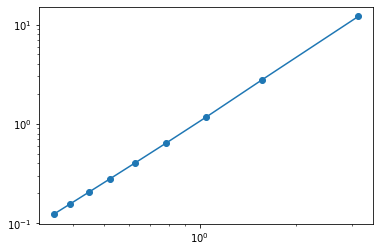

In [3]:
import matplotlib.pylab as plt
%matplotlib inline

num_iter = 9
n = 1
E = np.zeros(num_iter)
I_exact = -(np.exp(np.pi)+1)/2
f = lambda x: np.exp(x) * np.cos(x)
a = 0
b = np.pi

for j in range(0,num_iter):
    n_sub = j+1
    I = GL_quadrature(f,n,a,b,n_sub)
    E[j] = np.abs(I_exact - I)

h = np.pi/np.array([i+1 for i in range(0,num_iter)])
plt.loglog(h,E,'o-')
plt.show()

In [4]:
rate_of_convergence = (np.log(E[1::]) - np.log(E[0:-1]))/(np.log(h[1::])-np.log(h[0:-1]))
print(rate_of_convergence)

[2.11439233 2.14259134 2.08396227 2.05331058 2.03650033 2.02645945
 2.02002522 2.01566844]


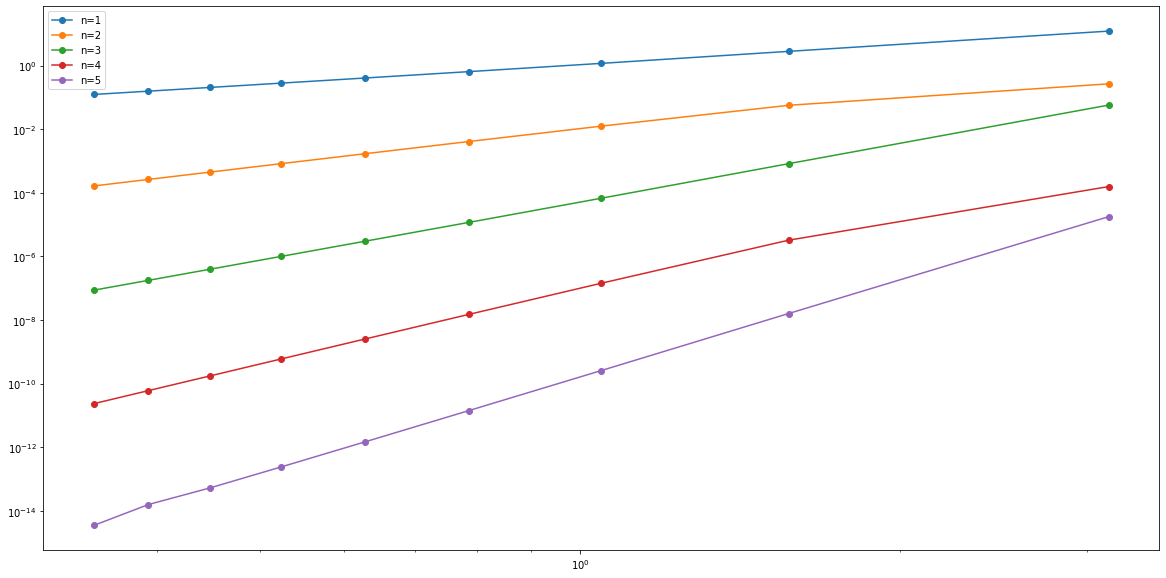

In [8]:
I_exact = -(np.exp(np.pi)+1)/2
f = lambda x: np.exp(x) * np.cos(x)
a = 0
b = np.pi

num_iter = 9
rates = np.zeros((5,8))
h = np.pi/np.array([i+1 for i in range(0,num_iter)])

plt.figure(figsize=(20,10))
for n in range(1,6):
    E = np.zeros(num_iter)
    for j in range(0,num_iter):
        n_sub = j+1
        I = GL_quadrature(f,n,a,b,n_sub)
        E[j] = np.abs(I_exact - I)
    
    plt.loglog(h,E,'o-',label='n={}'.format(n))
    rates[n-1,:] = (np.log(E[1::]) - np.log(E[0:-1]))/(np.log(h[1::])-np.log(h[0:-1]))

plt.legend()
plt.show()

In [9]:
rates

array([[ 2.11439233,  2.14259134,  2.08396227,  2.05331058,  2.03650033,
         2.02645945,  2.02002522,  2.01566844],
       [ 2.24254143,  3.71571597,  3.87821878,  3.93128909,  3.9555783 ,
         3.96882209,  3.97687157,  3.98214223],
       [ 6.11686521,  6.16284243,  6.09692985,  6.06180464,  6.04240514,
         6.03077687,  6.02331021,  6.01824824],
       [ 5.59775139,  7.67500787,  7.86246836,  7.92272251,  7.95013791,
         7.96510442,  7.97371287,  7.97980476],
       [10.11225419, 10.17238251, 10.10283812, 10.06020975,  9.99179582,
         9.85259063,  9.01640267, 12.76989838]])

### Chebyshev-Gauss quadrature

For $w(x) = 1/\sqrt{1-x^2}$ and the Legendre polynomial $T_n(x)$ on $[-1,1]$, the Gaussian formula is given by
\begin{equation*}
	\int_{-1}^1 w(x)f(x)\ dx \approx \sum_{j=1}^n w_j f(x_j),
\end{equation*}
where 
\begin{align*}
	x_j = \cos\left(\frac{(2j-1)\pi}{2n}\right)
\end{align*}
and
\begin{align*}
	w_j = \frac{-2}{(n+1)T_n'(x_j)T_{n+1}(x_j)} = \frac{\pi}{n}, \quad j=1,\cdots, n
\end{align*}

|$n$|$x_j$|$w_j$|
|:---:|:---:|:---:|
|$1$|$0$|$\pi$|
|$2$|$\displaystyle \pm {\frac{1}{\sqrt{2}}}$|$\frac{\pi}{2}$|
|$3$|$0$|$\displaystyle \frac{\pi}{3}$|
|   |$\displaystyle \pm \sqrt{\frac{3}{4}}$|$\displaystyle \frac{\pi}{3}$|
|$4$|$\displaystyle \pm \frac{1}{2}\sqrt{2-\sqrt{2}}$|$\displaystyle \frac{\pi}{4}$|
|   |$\displaystyle \pm \frac{1}{2}\sqrt{2+\sqrt{2}}$|$\displaystyle \frac{\pi}{4}$|
|$5$|$0$|$\displaystyle \frac{\pi}{5}$|
|   |$\displaystyle \pm \frac{1}{2}\sqrt{\frac{1}{2}(5-\sqrt{5})}$|$\displaystyle \frac{\pi}{5}$|
|   |$\displaystyle \pm \frac{1}{2}\sqrt{\frac{1}{2}(5+\sqrt{5})}$|$\displaystyle \frac{\pi}{5}$|